# Investigate a Dataset - Titanic Data

The data set that I have chosen for my Project - is Titanic Data


# Questions I am looking to analyze are:

1. What is the passenger's age frequency?
2. Which age groups survived better?
3. How does survival rate compare between Gender?
4. How does survival rate compare between PClass?
5. Is there any relation between Fare and Survival?



# Import necessary modules and Preliminary Data Anlaysis

In [2]:

# import necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math


# read the file
titanic= pd.read_csv('titanic-data.csv')

# understand the data
print ('******* Understand the contents of the file *********')
print(titanic.head() )
# to count all columns

print('******* Count of each column *********')
print (titanic.count())
print ('Size of the file =',titanic.shape)

print ('******* Understand the individual columns *********')
# to count unique values in a column
print ('Unique Name count = ', titanic['Name'].unique().shape[0] )
print ('Unique Sex count = ', titanic['Sex'].unique().shape[0]  )
print ('Unique PassengerId count = ', titanic['PassengerId'].unique().shape[0]   )
print ('Count of NULL Passengerid = ',titanic['PassengerId'].isnull().sum()      )
print ('Count of records with No Age information = ',titanic['Age'].isnull().sum())

print ('******* Understand the Age columns with fraction *********')
titanic[(titanic.Age%2).between(0,1,inclusive = False)]

******* Understand the contents of the file *********
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
57,58,0,3,"Novel, Mr. Mansouer",male,28.50,0,0,2697,7.2292,NaN,C
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
111,112,0,3,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C
116,117,0,3,"Connors, Mr. Patrick",male,70.50,0,0,370369,7.7500,NaN,Q
122,123,0,2,"Nasser, Mr. Nicholas",male,32.50,1,0,237736,30.0708,NaN,C
123,124,1,2,"Webber, Miss. Susan",female,32.50,0,0,27267,13.0000,E101,S
148,149,0,2,"Navratil, Mr. Michel (""Louis M Hoffman"")",male,36.50,0,2,230080,26.0000,F2,S
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.50,0,2,A/5. 851,14.5000,NaN,S
227,228,0,3,"Lovell, Mr. John Hall (""Henry"")",male,20.50,0,0,A/5 21173,7.2500,NaN,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S


# Intial Observations of the Data

1) PasssengerId is a best suited for unique key if needed
2) Age,Cabin and Embarked fields have NULLs in them
3) Age fields may need to be massaged if absolute value is to be used due to the following reason: Per Data Dictionary (reference:kaggle https://www.kaggle.com/c/titanic/data), Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
4) Age column can be used as is for intervals & histograms


# 1 - What is the passenger's age frequency?


 Objective : Understand and Represent visually the Age distribution of the Passengers
 Data scrubbing: Clean up the Naan values from the Age field in order to plot Histogram

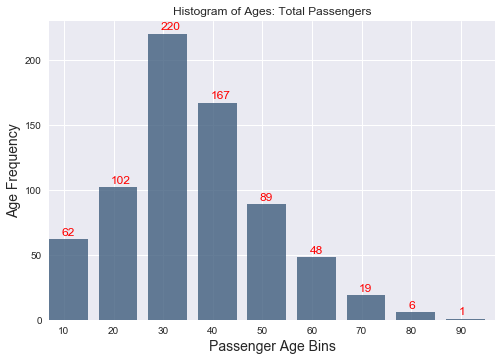

Mean Age of the Passengers is  29.6991176471
Median Age of the Passgengers is 28.0


In [3]:
# Histogram of Age

# prepare the data
x = titanic['Age'].dropna().values

# plot histogram
fig, ax = plt.subplots()
counts, bins, patches = ax.hist(x,color="#3F5D7D",alpha=0.8,width = 7.8,bins= 9, range = (0,90))

plt.title('Histogram of Ages: Total Passengers')
plt.axis([0, 90, 0, 230])

# plot the labels
for a,b in zip(bins,counts):
    plt.text(a+2.5,b+3 , int(b),color = 'red')

# set the x ticks
start, end = ax.get_xlim()

ax.xaxis.set_ticks(np.arange(start+3, end+3, 10))
ax.set_xticklabels(range(10,100,10))

plt.xlabel('Passenger Age Bins', fontsize=14)  
plt.ylabel('Age Frequency', fontsize=14)  
plt.grid(True)
plt.show()

print ('Mean Age of the Passengers is ', np.mean(x)     )
print ('Median Age of the Passgengers is', np.median(x)  )


# 1 - Observations:

It is clear from the above plot that the number of passengers who fall into the age category 20-30 peaks
Also, there are 7 passengers whose age is >= 80 & 60 passengers under the age of 10. 

With this understanding, it will be interesting to break the numbers further down and understand the Survived Vs Total Passengers foe the different age category.

# 2 - Which age groups survived better?

 Objective : Breakdown the dataset based on Survived flag and examine the numbers of Total Passengers Vs Survived Passengers. Respresent the results visually using histogram
 
 Data scrubbing: Clean up the Naan values from the Age field in order to plot Histogram

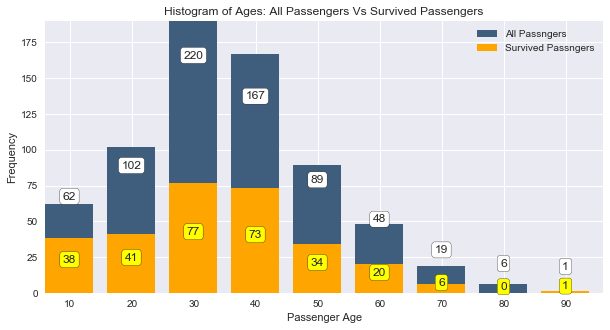

In [4]:

# prepare data

x1 = titanic['Age'].dropna().values
x2 = titanic['Age'][titanic.Survived == 1].dropna().values



# prepare the plot


fig, ax = plt.subplots(figsize=(10,5))
counts1, bins1, patches1 = plt.hist([x1],width = 7.8,bins= 9, range = (0,90),align=('mid'), color=['#3F5D7D'], label=['All Passngers'])
counts2, bins2, patches2 = plt.hist([x2],width = 7.8,bins= 9, range = (0,90),align=('mid'), color=['orange'], label=['Survived Passngers'])


# set the x-ticks

start, end = ax.get_xlim()


ax.xaxis.set_ticks(np.arange(start-1.5, end - 1.5, 10))
ax.set_xticklabels(range(0,100,10))


# plot annotate the histograms


for a,b,c,d in zip(bins1,counts1,bins2,counts2):
    
    # annotate the All Passengers Series
    plt.annotate(
        int(b),
        xy=(a+2,b-((b-d)/2)), xytext=(12, 20),
        textcoords='offset points', ha='center', va='bottom',
        bbox=dict(boxstyle='round,pad=0.25', fc='white')
        )
    
    # annotate the Survived Passengers Series
    plt.annotate(
        int(d),
        xy=(c+2,d/2), xytext=(12, 1),
        textcoords='offset points', ha='center', va='bottom',
        bbox=dict(boxstyle='round,pad=0.25', fc='yellow')
        )

plt.axis([0, 90, 0, 190])
plt.title("Histogram of Ages: All Passengers Vs Survived Passengers")
plt.xlabel("Passenger Age")
plt.ylabel("Frequency")
plt.legend()
plt.show()


# 2a - Observations

The top 3 groups based on Survived Percentage are
1)80-90 where the single passenger manager to survive
2)0-10 with the percentage of 61.29% (38/62)
3)30-40 with the percentage of 43.71% (73/167)

To futher understand the Survived Passengers Age Vs Number of Surived Passengers pattern, breakdown the data into different buckets based on Age.

Data Wrangling: Use Cut function to bin the data into desired buckets 


In [5]:
# Categorize the Passengers into different Age category and add the series to the Data Frame

bins = [0,10,20,30,40,50,60,70,80,90,100]
titanic['AgeFreq'] = pd.cut(titanic['Age'],bins,right=False)

# Create a Dataframe with the Survived passengers
age_freq_survived = titanic[['AgeFreq','PassengerId']][titanic.Survived == 1].groupby('AgeFreq',as_index=False).count()
#pd.Categorical(age_freq_survived.AgeFreq).codes

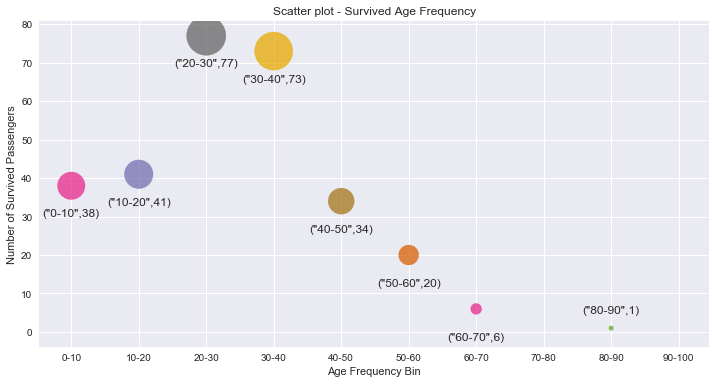

In [6]:
#bubblechart for Survived Passengers age category Vs the Number of Surivived passengers

# prepare data

# prepare the x position
x = pd.Categorical(age_freq_survived.AgeFreq).codes
# prepare the y position
y = age_freq_survived['PassengerId'].values

# prepare the size of the bubble
area = []
area.append(y*20)

# prepare the color of the bubble
#t = np.arange(10)
colors = np.random.rand(10)

# prepare the plot 
fig, ax = plt.subplots(figsize=(12,6))
plt.scatter(x, y, c=colors, s=area, cmap='Dark2',alpha=0.75)

plt.title('Scatter plot - Survived Age Frequency')
plt.xlabel('Age Frequency Bin')
plt.ylabel('Number of Survived Passengers')

labels = ['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100']

for label, a, b in zip(labels, x, y):
    # annotate first 7 datapoints & position the label below the bubble
    if a<7 :
        #print(a,b)
        plt.annotate(
            '("'+label+'",'+str(b)+')',
            xy=(a, b),
            xytext=(a,b-6),
            #xytext=(10,10),
            textcoords='data',
            ha='center', va='top'

                )
    # annotate 9th datapoint & position the label above the bubble to avoid cluttering the axis
    if a ==8 :
         plt.annotate(
            '("'+label+'",'+str(b)+')',
            xy=(a, b),
            xytext=(a,b+6),
            #xytext=(10,10),
            textcoords='data',
            ha='center', va='top')
                
ax.set_xticks(x)
ax.set_xticklabels(labels)        

plt.show()

# 2b - Observations:
It is evident from the plot that the Survived Passenger Counts trend up as the Age category increases from 0-10 to 20-30 and then begins to drop from there on. This correlation however does not prove causation as there are several other Independent Variables such as Total Passengers in the respective category, Gender, Class etc.


# 3 - How does survival rate compare between Gender?

The objective is to understand if one gender fared better than the other within the same Age category. 
In order to do so, I am planning to breakdown the Age category data further into 2 groups Male Vs Female by grouping the Data frame by a) AgeFreq (derived column from above), b)Sex and c)PassengerId

Further, I am planning to inner join the 2 dataframes using merge function in order to compute the "Survival Rate".

With the above steps: I am planning to 
a) calculate Survival Rate for Male & Female Passgengers within each Age Category bucket. 
b) plot the resultant data using bar charts



In [7]:
# Prepare new Dataframe for the deceased passengers. This is aggregated by Agecategory & Sex
titanic_agefreq_sex_deceased_grp = titanic[['AgeFreq','PassengerId','Sex']][titanic.Survived == 0].groupby(['AgeFreq','Sex',],as_index=False).count()
titanic_agefreq_sex_deceased_grp['PassengerId'] = titanic_agefreq_sex_deceased_grp['PassengerId'].fillna(0)

# Prepare new Dataframe for the survived passengers. This is aggregated by Agecategory & Sex
titanic_agefreq_sex_survived_grp = titanic[['AgeFreq','PassengerId','Sex']][titanic.Survived == 1].groupby(['AgeFreq','Sex',],as_index=False).count()
titanic_agefreq_sex_survived_grp['PassengerId'] = titanic_agefreq_sex_survived_grp['PassengerId'].fillna(0)


# Merge the above 2 Dataframe on Sex and Age Freq. This is inorder to obtain Deceased & Surived Passenger counts as 2 series
titanic_agefreq_sex_grp = pd.merge(titanic_agefreq_sex_deceased_grp, titanic_agefreq_sex_survived_grp,  how='inner', on = ['AgeFreq','Sex'],suffixes=('_d', '_s'))


# Calculate the series Survial Rate: treat the Naan as 0
titanic_agefreq_sex_grp['Survival Rate'] = round( (titanic_agefreq_sex_grp['PassengerId_s'] / (titanic_agefreq_sex_grp['PassengerId_d'] + titanic_agefreq_sex_grp['PassengerId_s'])) * 100,2 )

# Split the dataframe from above into Male and Female
titanic_agefreq_male_grp = titanic_agefreq_sex_grp[['AgeFreq','Survival Rate']][titanic_agefreq_sex_grp.Sex == 'male']
titanic_agefreq_female_grp = titanic_agefreq_sex_grp[['AgeFreq','Survival Rate']][titanic_agefreq_sex_grp.Sex == 'female']

# print results

#print(titanic_agefreq_sex_grp)
#print ( titanic[titanic.Age >= 70] )


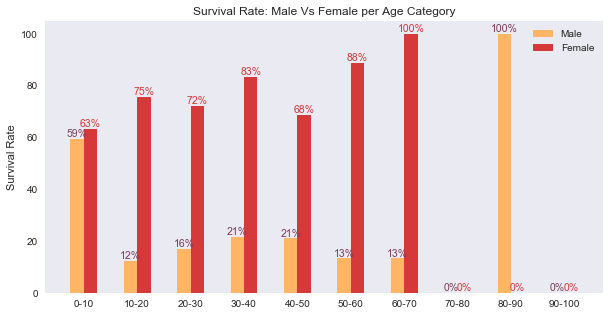

In [8]:
# Plot the Chart to study Survival Rate Between Genter across the Age Category
pos = list(range(len( titanic_agefreq_male_grp['AgeFreq'])))

# Prepare the x-position
width = 0.25
x1 = list(range(len( titanic_agefreq_male_grp['AgeFreq'])))
x2 = [p + width for p in pos]

# prepare the height
y1 = titanic_agefreq_male_grp['Survival Rate'].fillna(value=0)
y2 = titanic_agefreq_female_grp['Survival Rate'].fillna(value=0)


# Prepare and Plot the bar chart
fig, ax = plt.subplots(figsize=(10,5))

labels = ['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100']

# Create a bar with male data
plt.bar(x1,
        y1,
        width,
        color='#ffb563'        
        )

# Create a bar with female data
# adjust the position pos with buffer width,
plt.bar(x2,
        y2,
        width,
        color='#d53939'
        )


for a,b,c,d in zip(x1,y1,x2,y2):
    
    plt.annotate(
        str(int(b))+str("%"),
        xy=(a,b),  
        ha='center', va='bottom',
        color = '#7b3c59',
        fontsize = 10.5 
        )
    plt.annotate(
        str(int(d))+str("%"),
        xy=(c,d), 
        ha='center', va='bottom',
        color = '#d53939',
        fontsize = 10.5
        )


# Set the y axis label
ax.set_ylabel('Survival Rate')

# Set the chart's title
ax.set_title('Survival Rate: Male Vs Female per Age Category')

# Set the position of the x ticks
ax.set_xticks([p+width/2 for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(labels)

# Adding the legend and showing the plot
plt.legend(['Male', 'Female'], loc='upper right')
plt.grid()
plt.show()

# 3 - Observations:
From the above analysis, it is evident that the Survival rate of Female across age is higher than that of male. 
The aberration is in the bucket 80-90 where it appears as though male survival rate pipped the female survival rate. On further analysis, there was only 1 passenger who was male and survived. There were no Female passengers in the age category.


# 4 - How does survival rate compare between PClass?

The objective is to understand if passengers associated with one PClass fared better than the other
In order to do so: I am planning to 

a) calculate Survived and Deceased count of Passengers across each Pclass by aggregating the data by fields 'Pclass' and 'Survived'
b) plot the resultant data using stacked bar charts


In [9]:
# group the data by Pclass and Survived flag
class_survived_grp = titanic[['Pclass','Survived','PassengerId']].groupby(['Pclass','Survived'],as_index=False).count()



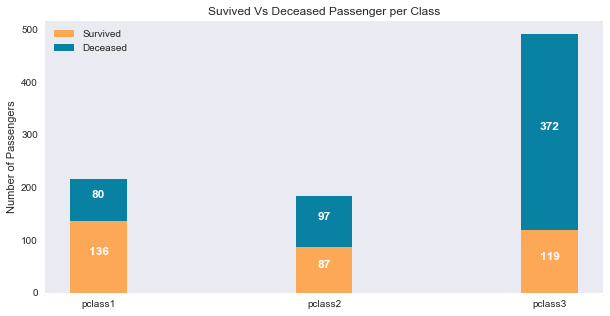

In [10]:

# prepare the data

# Setting the x-position, y-position
A = class_survived_grp['PassengerId'][class_survived_grp.Survived ==1]
B = class_survived_grp['PassengerId'][class_survived_grp.Survived ==0]
pos = list(range(len(A)))
width = 0.25

# prepare the labels

labels = ['pclass1','pclass2','pclass3']

# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

# Create a bar with survived data in position pos

plt.bar(pos, A, width, color = '#fda856')


plt.bar(pos,B, width, color = '#0881a3', bottom = A)

for a,b,c,d in zip(pos,A,pos,B):
       plt.annotate(b,xy =(a,b/2),ha='center', va='bottom', color = 'white',fontweight='bold',fontsize = 12 )
       plt.annotate(d,xy =(a,(b+d)- (d/2) ),ha='center', va='bottom',color = 'white',fontweight='bold',fontsize = 12 ) 
        
    
# Set the y axis label
ax.set_ylabel('Number of Passengers')

# Set the chart's title
ax.set_title('Suvived Vs Deceased Passenger per Class')

# Set the position of the x ticks
ax.set_xticks([p for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(labels)

# Adding the legend and showing the plot
plt.legend(['Survived', 'Deceased'], loc='upper left')
plt.grid()
plt.show()

# 4 - Observations:
From the above analysis,the survival rate per Pclass are:
Pclass1 = 63% (136/216)
Pclass2 = 47% (87/184)
Pclass3 = 24% (119/491)

Survival rate of Pclass1 is observed to be better than the survival rate of Plcass2 & Pclass3.


# 5 - Is there any relation between Fare and Survival?

The objective is to find out if there is any relation between Fare and Survival. Was the survival rate bettwe in the higher Fare bracket?

In order to analyze this, 
a) I am planning to compute the fare into different bins and then compute the surivial rate for each bin using cut function
b) Merge 3 dataframes (left join)  to obtain counts of Total Passenger, Deceased Passenger and Survived Passenger
b) plot the resultant data using bubble plot

In [11]:
# Create dataframes grouped by Fare for 3 sets of data: i.e. Survived Passengers, Deceased Passengers and Total Passengers
fare_survived_grp = titanic[['Fare','PassengerId']][titanic.Survived == 1].groupby(['Fare'],as_index=False).count()
fare_deceased_grp = titanic[['Fare','PassengerId']][titanic.Survived == 0].groupby(['Fare'],as_index=False).count()
fare_total_grp = titanic[['Fare','PassengerId']].groupby(['Fare'],as_index=False).count()

# Rename PassengerId to suitable name: AllPassengerCount
fare_total_grp.rename(columns={'PassengerId':'AllPassengerCount'},inplace=True)

# merge fare_total_grp with fare_survived_grp. Use left join to capture all the Passengers
tmp_grp = pd.merge(fare_total_grp,fare_survived_grp,on='Fare',how='left')

#rename PassengerId to suitable name: SurvivedPassengerCount
tmp_grp.rename(columns={'PassengerId':'SurvivedPassengerCount'},inplace=True)

# merge tmp_grp with fare_deceased_grp. Use left join to capture all the Passengers
fare_grp = pd.merge(tmp_grp,fare_deceased_grp,on='Fare',how='left')

#rename PassengerId to suitable name: DeceasedPassengerCount
fare_grp.rename(columns={'PassengerId':'DeceasedPassengerCount'},inplace=True)


# Cut the Fare into multiple bins
bins = [-1,0,10,20,30,40,50,60,70,80,90,100,200,300,500,600]
fare_grp['FareFreq'] = pd.cut(fare_grp['Fare'],bins)

# Create a Dataframe aggregated at the FareReq level and compute the survival rate
cat_fare_grp = fare_grp[['FareFreq','SurvivedPassengerCount','DeceasedPassengerCount','AllPassengerCount']].groupby(['FareFreq'],as_index=False).sum()
cat_fare_grp['SurvivedRate'] = cat_fare_grp['SurvivedPassengerCount'].fillna(0) / cat_fare_grp['AllPassengerCount'].fillna(1)



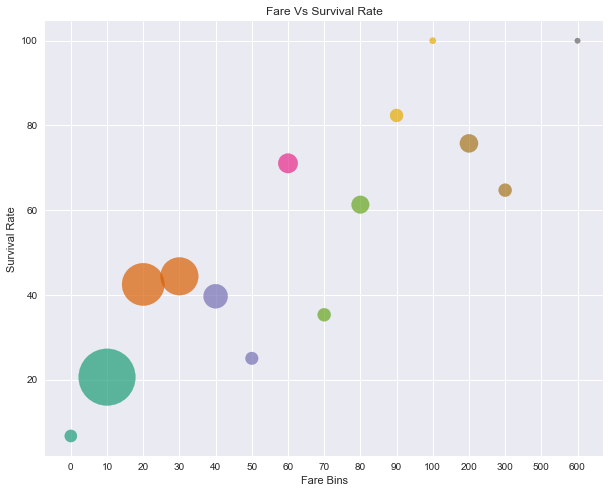

In [12]:

# Prepare the x and y position
x = pd.Categorical(cat_fare_grp.FareFreq).codes
y = round( cat_fare_grp['SurvivedRate'] * 100 ,2 )

# Prepare the bubble size
area = []
area.append(cat_fare_grp['AllPassengerCount']*10)


# prepare the lables
t = np.arange(len(x))
labels = [0,10,20,30,40,50,60,70,80,90,100,200,300,500,600]

# plot the data

fig, ax = plt.subplots(figsize=(10,8))

plt.scatter(x,
            y,
            alpha=0.7,
            s=area,
           c=t,
           cmap='Dark2')


# Chart title
plt.title('Fare Vs Survival Rate')

# y label
plt.ylabel('Survival Rate')

# x label
plt.xlabel('Fare Bins')


# Set the position of the x ticks
ax.set_xticks(x)

# Set the labels for the x ticks
ax.set_xticklabels(labels)

plt.show()

# 5 - Observations:
From the above analysis,the survival rate seems to improve as the Fare price goes up based on the available data set. Note: This cannot however be attributed as causation as there are other independent variables that could have influenced the survival.

# Conclusion:

This concludes my data analyis on Titanic dataset.I was able to gain insight into the problem at hand and derive at the answers using Pandas, Numpy and Matplotlib.

# Reference

1) https://stackoverflow.com/
2) https://chrisalbon.com/#Python
3) http://matplotlib.org/
4) udacity Forum
5) pandas documentation